# 📌 Assignment: Model Optimization and Performance Tuning

# 🚀 Solve It Yourself!

This assignment is your chance to think like a data scientist. Don’t rely on AI to do the work for you — the real learning happens when you explore, experiment, and problem-solve.

Mistakes are okay — they’re part of the journey. Trust your skills, stay curious, and give it your best shot.

You’ve got this! 💪

## 🎯 Objective:

- Explore Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree (with CCP Post-Pruning), and Random Forest.
- Optimize and compare model performance.

## 📌 Hint:

- Make a result dataframe to append to it model name and performance metrics for final comparison (use visualization as well).
---

## 📝 Part 1: Data Preparation
1. **Download a dataset from Kagglehub**.
2. **Load the dataset** and inspect its structure (columns, types, missing values).
3. **Preprocess the data:**
   - Handle missing values
   - Encode categorical variables
   - Scale numeric features

👉 **Question:** What preprocessing steps did you apply, and why?

In [61]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("wenruliu/adult-income-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\pc\.cache\kagglehub\datasets\wenruliu\adult-income-dataset\versions\2


In [62]:
import os
import pandas as pd

data_name = os.listdir(path)[0]

full_path = os.path.join(path,data_name)

df = pd.read_csv(full_path)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [64]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [65]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

No need to handle missing values as there isn't any but if there was I'd choose the appropriate method such as KNN or median imputation depending on the feature

In [66]:
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in age: [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
Unique values in workclass: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Unique values in fnlwgt: [226802  89814 336951 ... 129912 255835 257302]
Unique values in education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
Unique values in educational-num: [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
Unique values in marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
Unique values in occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-s

In [67]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


education_map = {
    'Preschool': 1,'1st-4th': 2,'5th-6th': 3,'7th-8th': 4,'9th': 5,'10th': 6,
    '11th': 7,'12th': 8,'HS-grad': 9,'Some-college': 10,'Assoc-voc': 11,'Assoc-acdm': 12,
    'Bachelors': 13,'Masters': 14,'Prof-school': 15,'Doctorate': 16
}
income_map = {'<=50K': 0, '>50K': 1}
gender_map = {'Male': 0, 'Female': 1}

df['gender_encoded'] = df['gender'].map(gender_map)
df['education_encoded'] = df['education'].map(education_map)
df['income_encoded'] = df['income'].map(income_map)

nominal_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']

encoded_dfs = []

for col in nominal_cols:
    encoder = OneHotEncoder(sparse_output=False)
    encoded = encoder.fit_transform(df[[col]])
    
    col_names = encoder.get_feature_names_out([col])
    encoded_df = pd.DataFrame(encoded, columns=col_names, index=df.index)
    
    encoded_dfs.append(encoded_df)

all_dfs = [df] + encoded_dfs
df_encoded = pd.concat(all_dfs, axis=1)

df_encoded.drop(['gender', 'education', 'income'] + nominal_cols, axis=1, inplace=True)

df_encoded

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,gender_encoded,education_encoded,income_encoded,workclass_?,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,226802,7,0,0,40,0,7,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,38,89814,9,0,0,50,0,9,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,28,336951,12,0,0,40,0,12,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,44,160323,10,7688,0,40,0,10,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,18,103497,10,0,0,30,1,10,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,1,12,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48838,40,154374,9,0,0,40,0,9,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48839,58,151910,9,0,0,40,1,9,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
48840,22,201490,9,0,0,20,0,9,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Used `label encoding` for ordinal features because there is a meaningful order and `one hot encoding` for nominal features

In [68]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        48790 non-null  int64  
 1   fnlwgt                                     48790 non-null  int64  
 2   educational-num                            48790 non-null  int64  
 3   capital-gain                               48790 non-null  int64  
 4   capital-loss                               48790 non-null  int64  
 5   hours-per-week                             48790 non-null  int64  
 6   gender_encoded                             48790 non-null  int64  
 7   education_encoded                          48790 non-null  int64  
 8   income_encoded                             48790 non-null  int64  
 9   workclass_?                                48790 non-null  float64
 10  workclass_Federal-gov      

In [69]:
float_cols = df_encoded.select_dtypes(include=['float']).columns.tolist()
for col in float_cols:
    df_encoded[col] = df_encoded[col].astype(int)

Set all float columns to int for consistency (they had no remainders anyways)

In [70]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48790 entries, 0 to 48841
Data columns (total 93 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        48790 non-null  int64
 1   fnlwgt                                     48790 non-null  int64
 2   educational-num                            48790 non-null  int64
 3   capital-gain                               48790 non-null  int64
 4   capital-loss                               48790 non-null  int64
 5   hours-per-week                             48790 non-null  int64
 6   gender_encoded                             48790 non-null  int64
 7   education_encoded                          48790 non-null  int64
 8   income_encoded                             48790 non-null  int64
 9   workclass_?                                48790 non-null  int32
 10  workclass_Federal-gov                      48790 no

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df_encoded.drop('income_encoded', axis=1)  # Features
y = df_encoded['income_encoded']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Did the train test split before standardizing data to avoid data leakage

## 🔍 Part 2: Model Building

### 🔹 2.1 Logistic Regression
- Build a baseline Logistic Regression model.
- **Experiment:** Tune the `C` parameter (regularization strength).

👉 **Question:** How does changing `C` affect the model’s performance?

C = 0.001:
  Train accuracy: 0.8135
  Test accuracy: 0.8091
  Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89     11094
           1       0.77      0.30      0.43      3543

    accuracy                           0.81     14637
   macro avg       0.79      0.64      0.66     14637
weighted avg       0.80      0.81      0.78     14637

--------------------------------------------------
C = 0.01:
  Train accuracy: 0.8364
  Test accuracy: 0.8355
  Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11094
           1       0.73      0.51      0.60      3543

    accuracy                           0.84     14637
   macro avg       0.79      0.72      0.75     14637
weighted avg       0.83      0.84      0.82     14637

--------------------------------------------------
C = 0.1:
  Train accuracy: 0.8449
  Test accuracy: 0.8438
  Classification 

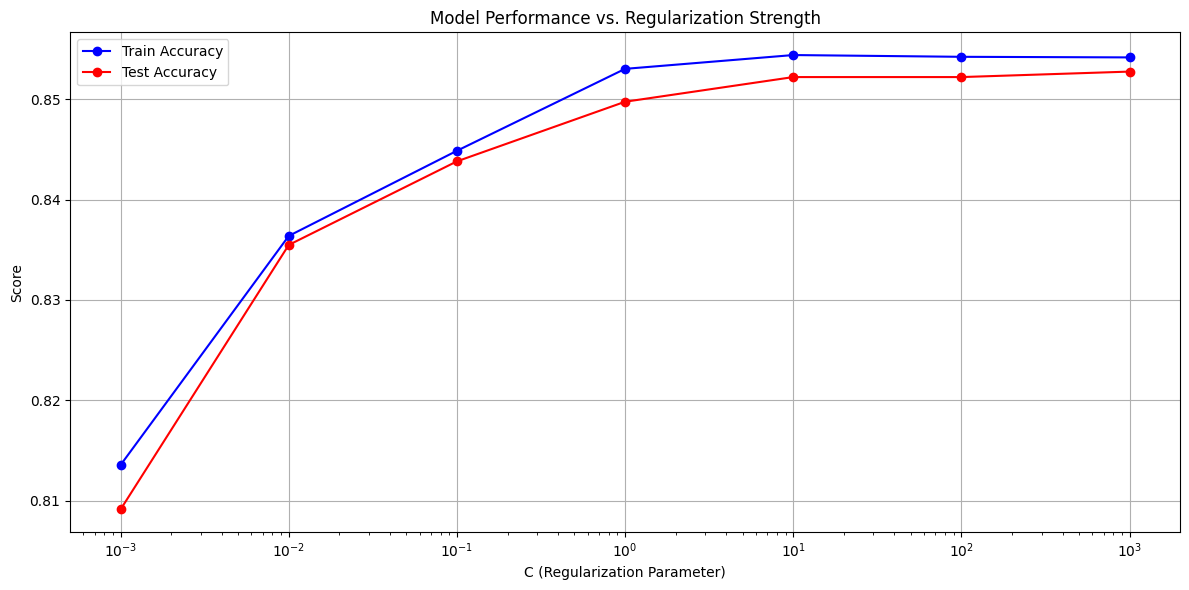

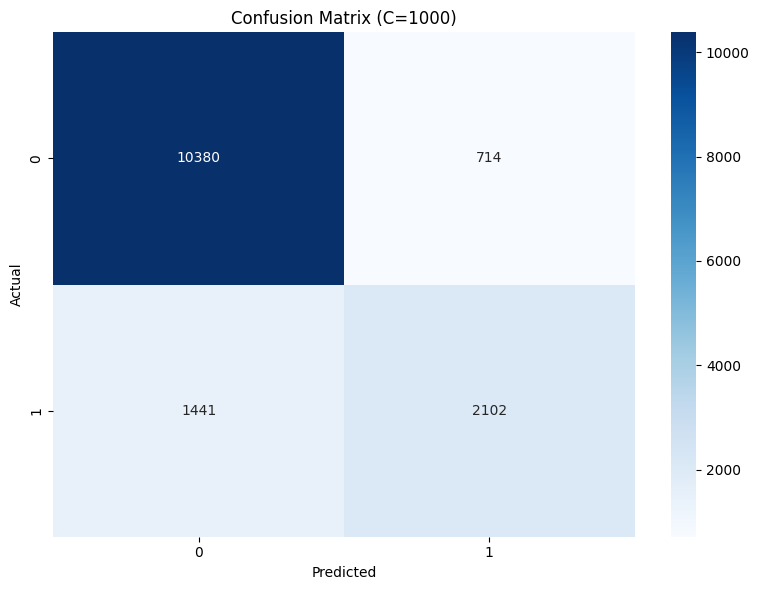

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define a range of C values to test
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

train_scores = []
test_scores = []

# Train models with different C values
for c in c_values:
    # Create and train the model
    model = LogisticRegression(C=c, max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate and store accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    
    print(f"C = {c}:")
    print(f"  Train accuracy: {train_acc:.4f}")
    print(f"  Test accuracy: {test_acc:.4f}")
    print("  Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print("-" * 50)

# Plot the results
plt.figure(figsize=(12, 6))
plt.semilogx(c_values, train_scores, 'b-o', label='Train Accuracy')
plt.semilogx(c_values, test_scores, 'r-o', label='Test Accuracy')
plt.xlabel('C (Regularization Parameter)')
plt.ylabel('Score')
plt.title('Model Performance vs. Regularization Strength')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Find the best C value
best_c = c_values[np.argmax(test_scores)]
print(f"Best C value based on test accuracy: {best_c}")

# Train a model with the best C value for detailed analysis
best_model = LogisticRegression(C=best_c, max_iter=1000, random_state=42)
best_model.fit(X_train_scaled, y_train)
y_test_pred = best_model.predict(X_test_scaled)

# Create a confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (C={best_c})')
plt.tight_layout()

Increasing the regularization parameter signaficiantly improves the model's performance on the test set up to a certain amount which is 100 then it starts to decrease.

### 🔹 2.2 K-Nearest Neighbors (KNN)
- Train a KNN model with a default `k=5`.
- **Experiment:**
   - Test different values of `k`.
   - Compare performance using `euclidean` vs. `manhattan` distance.

👉 **Question:** What is the best `k` for your dataset? Why did it perform better?

k = 5:
  Euclidean - Train accuracy: 0.8749, Test accuracy: 0.8267
  Manhattan - Train accuracy: 0.8753, Test accuracy: 0.8293
--------------------------------------------------
k = 6:
  Euclidean - Train accuracy: 0.8638, Test accuracy: 0.8286
  Manhattan - Train accuracy: 0.8634, Test accuracy: 0.8287
--------------------------------------------------
k = 7:
  Euclidean - Train accuracy: 0.8652, Test accuracy: 0.8316
  Manhattan - Train accuracy: 0.8656, Test accuracy: 0.8308
--------------------------------------------------
k = 8:
  Euclidean - Train accuracy: 0.8593, Test accuracy: 0.8306
  Manhattan - Train accuracy: 0.8587, Test accuracy: 0.8311
--------------------------------------------------
k = 9:
  Euclidean - Train accuracy: 0.8600, Test accuracy: 0.8332
  Manhattan - Train accuracy: 0.8597, Test accuracy: 0.8321
--------------------------------------------------
k = 10:
  Euclidean - Train accuracy: 0.8557, Test accuracy: 0.8332
  Manhattan - Train accuracy: 0.8554, Test

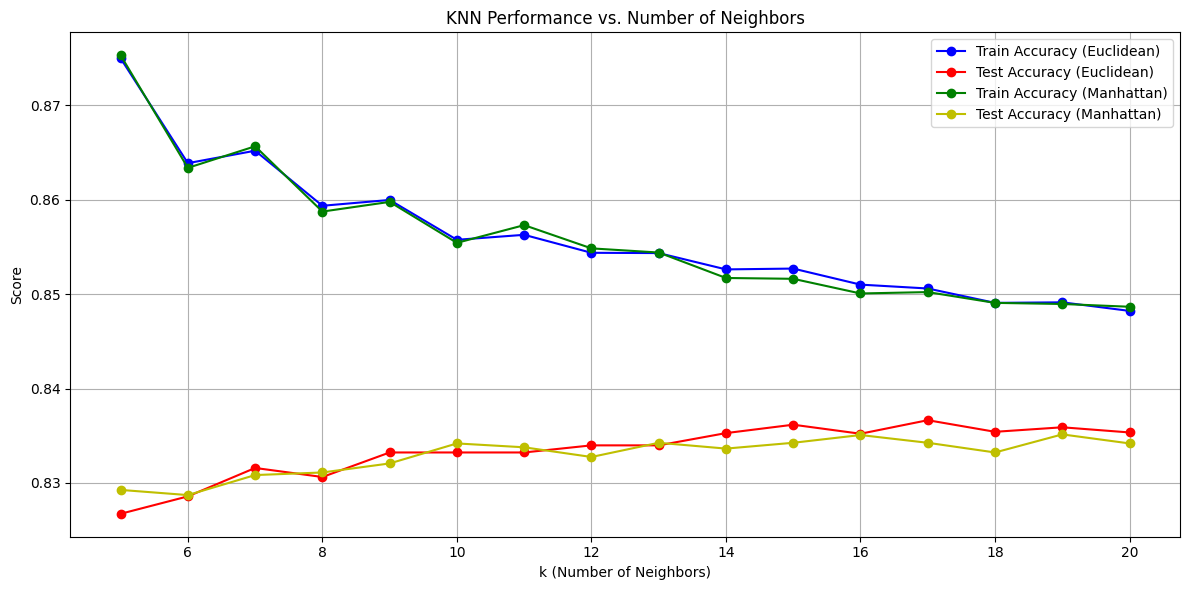

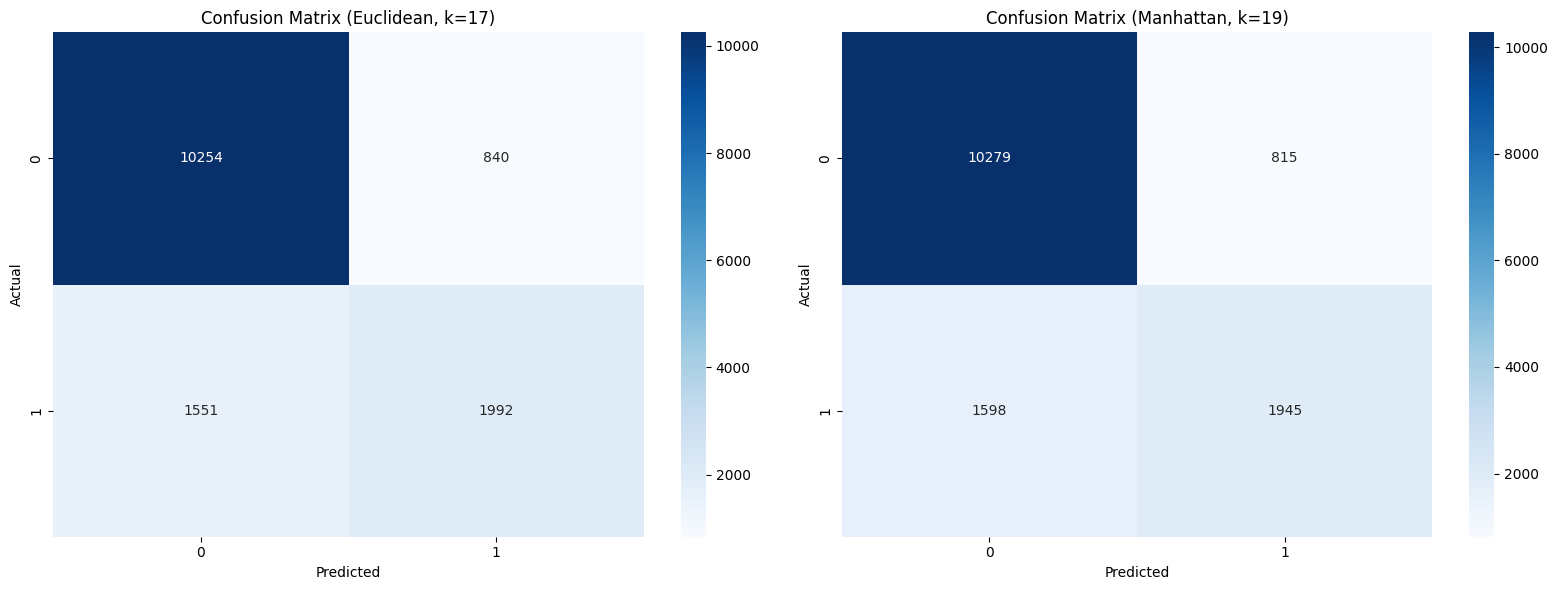

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# Define a range of k values to test (small range to save runtime)
k_values = range(5, 21)

# Initialize lists to store accuracy scores for both distance metrics
train_scores_euclidean = []
test_scores_euclidean = []
train_scores_manhattan = []
test_scores_manhattan = []

# Train models with different k values and distance metrics
for k in k_values:
    # Create and train the model with Euclidean distance
    model_euclidean = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model_euclidean.fit(X_train_scaled, y_train)
    
    # Predict on train and test sets
    y_train_pred_euclidean = model_euclidean.predict(X_train_scaled)
    y_test_pred_euclidean = model_euclidean.predict(X_test_scaled)
    
    # Calculate and store accuracy scores
    train_acc_euclidean = accuracy_score(y_train, y_train_pred_euclidean)
    test_acc_euclidean = accuracy_score(y_test, y_test_pred_euclidean)
    
    train_scores_euclidean.append(train_acc_euclidean)
    test_scores_euclidean.append(test_acc_euclidean)
    
    # Create and train the model with Manhattan distance
    model_manhattan = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model_manhattan.fit(X_train_scaled, y_train)
    
    # Predict on train and test sets
    y_train_pred_manhattan = model_manhattan.predict(X_train_scaled)
    y_test_pred_manhattan = model_manhattan.predict(X_test_scaled)
    
    # Calculate and store accuracy scores
    train_acc_manhattan = accuracy_score(y_train, y_train_pred_manhattan)
    test_acc_manhattan = accuracy_score(y_test, y_test_pred_manhattan)
    
    train_scores_manhattan.append(train_acc_manhattan)
    test_scores_manhattan.append(test_acc_manhattan)
    
    print(f"k = {k}:")
    print(f"  Euclidean - Train accuracy: {train_acc_euclidean:.4f}, Test accuracy: {test_acc_euclidean:.4f}")
    print(f"  Manhattan - Train accuracy: {train_acc_manhattan:.4f}, Test accuracy: {test_acc_manhattan:.4f}")
    print("-" * 50)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores_euclidean, 'b-o', label='Train Accuracy (Euclidean)')
plt.plot(k_values, test_scores_euclidean, 'r-o', label='Test Accuracy (Euclidean)')
plt.plot(k_values, train_scores_manhattan, 'g-o', label='Train Accuracy (Manhattan)')
plt.plot(k_values, test_scores_manhattan, 'y-o', label='Test Accuracy (Manhattan)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Score')
plt.title('KNN Performance vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Find the best k value for each distance metric
best_k_euclidean = k_values[np.argmax(test_scores_euclidean)]
best_k_manhattan = k_values[np.argmax(test_scores_manhattan)]
print(f"Best k value based on test accuracy (Euclidean): {best_k_euclidean}")
print(f"Best k value based on test accuracy (Manhattan): {best_k_manhattan}")

# Train a model with the best k value for detailed analysis
best_model_euclidean = KNeighborsClassifier(n_neighbors=best_k_euclidean, metric='euclidean')
best_model_euclidean.fit(X_train_scaled, y_train)
y_test_pred_euclidean = best_model_euclidean.predict(X_test_scaled)

best_model_manhattan = KNeighborsClassifier(n_neighbors=best_k_manhattan, metric='manhattan')
best_model_manhattan.fit(X_train_scaled, y_train)
y_test_pred_manhattan = best_model_manhattan.predict(X_test_scaled)

# Create confusion matrices
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
cm_euclidean = confusion_matrix(y_test, y_test_pred_euclidean)
sns.heatmap(cm_euclidean, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Euclidean, k={best_k_euclidean})')

plt.subplot(1, 2, 2)
cm_manhattan = confusion_matrix(y_test, y_test_pred_manhattan)
sns.heatmap(cm_manhattan, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Manhattan, k={best_k_manhattan})')

plt.tight_layout()

The best k value is the one that provides the highest test accuracy.
A smaller k can lead to a model that is too sensitive to noise (high variance), while a larger k can lead to a model that is too generalized (high bias).

The choice of distance metric (Euclidean vs. Manhattan) can affect the model's sensitivity to the scale and distribution of the data.

Overall we get the best results with euclidean metric (84.94% accuracy) with k of 16 or manhatten with k of 19 (84.74% accuracy).

## 🌳 Part 3: Decision Tree with Pre-pruning & CCP (Post Pruning)
- Train a Decision Tree with default settings.
- Try pre-pruning hyperparameters.
- Check feature importance attribute.
- Extract `ccp_alpha` values using `cost_complexity_pruning_path`.
- Build pruned trees for different `ccp_alpha` values.

👉 **Question:** What pre-pruning hyperparameter did you tune? How did you change them to increase performance?

👉 **Question:** Which `ccp_alpha` value gave the best results, and why?

👉 **Question:** How did the tree size change after pruning?

### Pre-pruning Hyperparameters


In [74]:
from sklearn.tree import DecisionTreeClassifier

# Define a range of pre-pruning hyperparameters to test
max_depth_values = [None, 5, 10, 15]
min_samples_split_values = [2, 10, 20]
min_samples_leaf_values = [1, 5, 10]

best_accuracy = 0
best_params = {}

# Train models with different pre-pruning hyperparameters
for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        for min_samples_leaf in min_samples_leaf_values:
            # Create and train the model
            model = DecisionTreeClassifier(max_depth=max_depth, 
                                           min_samples_split=min_samples_split, 
                                           min_samples_leaf=min_samples_leaf, 
                                           random_state=42)
            model.fit(X_train, y_train)
            
            # Predict on test set
            y_test_pred = model.predict(X_test)
            
            # Calculate accuracy
            test_acc = accuracy_score(y_test, y_test_pred)
            
            if test_acc > best_accuracy:
                best_accuracy = test_acc
                best_params_decision_tree = {
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf
                }
            
            print(f"max_depth={max_depth}, min_samples_split={min_samples_split}, min_samples_leaf={min_samples_leaf}")
            print(f"  Test accuracy: {test_acc:.4f}")
            print("-" * 50)

print(f"Best pre-pruning parameters: {best_params_decision_tree} with accuracy: {best_accuracy:.4f}")

max_depth=None, min_samples_split=2, min_samples_leaf=1
  Test accuracy: 0.8149
--------------------------------------------------
max_depth=None, min_samples_split=2, min_samples_leaf=5
  Test accuracy: 0.8295
--------------------------------------------------
max_depth=None, min_samples_split=2, min_samples_leaf=10
  Test accuracy: 0.8406
--------------------------------------------------
max_depth=None, min_samples_split=10, min_samples_leaf=1
  Test accuracy: 0.8257
--------------------------------------------------
max_depth=None, min_samples_split=10, min_samples_leaf=5
  Test accuracy: 0.8295
--------------------------------------------------
max_depth=None, min_samples_split=10, min_samples_leaf=10
  Test accuracy: 0.8406
--------------------------------------------------
max_depth=None, min_samples_split=20, min_samples_leaf=1
  Test accuracy: 0.8340
--------------------------------------------------
max_depth=None, min_samples_split=20, min_samples_leaf=5
  Test accuracy: 0.8

I defined a range of values for the parameters and tested them all then choose the values that produce the highest accuracy which are:

{'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1} with accuracy: 86.60%

Note: I didn't use the scaled df given that decision trees aren't based on calculating distances so it's unnecassary

### Post-pruning with CCP (Cost Complexity Pruning)

ccp_alpha = 0.0:
  Train accuracy: 1.0000
  Test accuracy: 0.8149
--------------------------------------------------
ccp_alpha = 1.0424363512949079e-06:
  Train accuracy: 1.0000
  Test accuracy: 0.8149
--------------------------------------------------
ccp_alpha = 3.0785278557483826e-06:
  Train accuracy: 1.0000
  Test accuracy: 0.8149
--------------------------------------------------
ccp_alpha = 3.6479689502128855e-06:
  Train accuracy: 1.0000
  Test accuracy: 0.8149
--------------------------------------------------
ccp_alpha = 4.4240658861385964e-06:
  Train accuracy: 1.0000
  Test accuracy: 0.8149
--------------------------------------------------
ccp_alpha = 5.20924795127328e-06:
  Train accuracy: 1.0000
  Test accuracy: 0.8149
--------------------------------------------------
ccp_alpha = 6.041905728609577e-06:
  Train accuracy: 1.0000
  Test accuracy: 0.8149
--------------------------------------------------
ccp_alpha = 6.3064625474955756e-06:
  Train accuracy: 1.0000
  Test ac

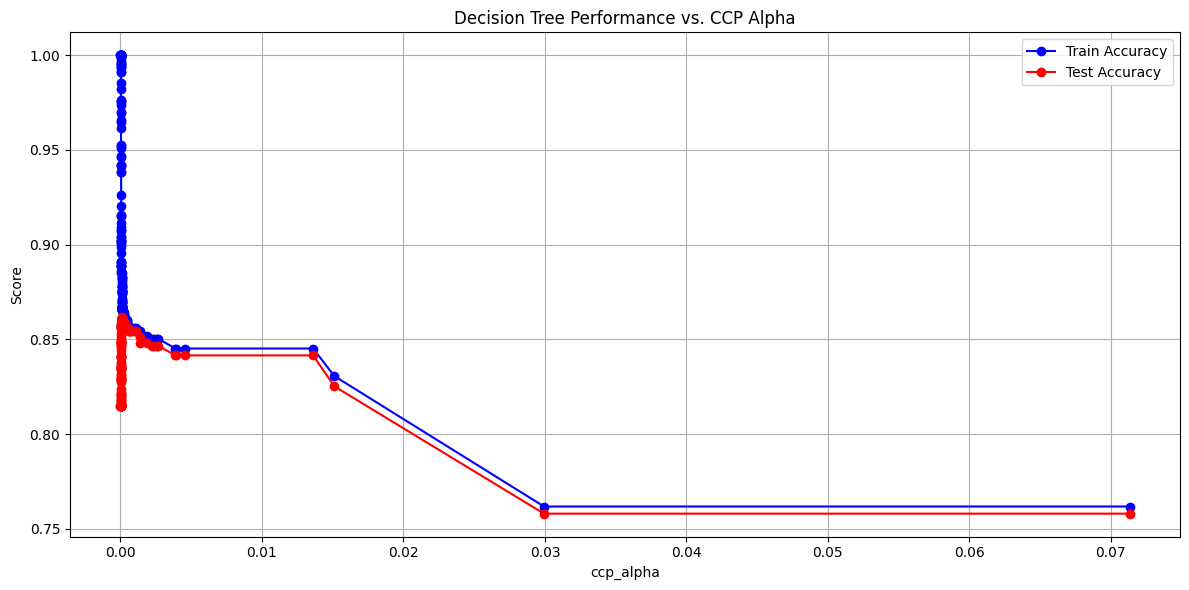

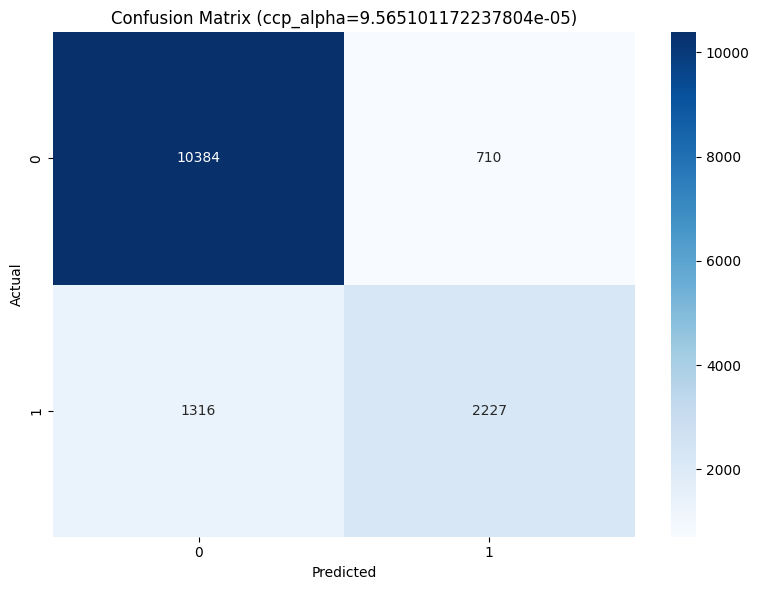

In [75]:
# Check feature importance
best_model = DecisionTreeClassifier(**best_params_decision_tree, random_state=42)
best_model.fit(X_train, y_train)
feature_importances = best_model.feature_importances_

# Extract ccp_alpha values using cost_complexity_pruning_path
path = best_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

train_scores = []
test_scores = []

# Train pruned trees for different ccp_alpha values
for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    
    # Predict on train and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate and store accuracy scores
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    
    print(f"ccp_alpha = {ccp_alpha:}:")
    print(f"  Train accuracy: {train_acc:.4f}")
    print(f"  Test accuracy: {test_acc:.4f}")
    print("-" * 50)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(ccp_alphas, train_scores, 'b-o', label='Train Accuracy')
plt.plot(ccp_alphas, test_scores, 'r-o', label='Test Accuracy')
plt.xlabel('ccp_alpha')
plt.ylabel('Score')
plt.title('Decision Tree Performance vs. CCP Alpha')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Find the best ccp_alpha value
best_ccp_alpha = ccp_alphas[np.argmax(test_scores)]
print(f"Best ccp_alpha value based on test accuracy: {best_ccp_alpha}")

# Train a model with the best ccp_alpha value for detailed analysis
best_pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
best_pruned_model.fit(X_train, y_train)
y_test_pred = best_pruned_model.predict(X_test)

# Create a confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (ccp_alpha={best_ccp_alpha})')
plt.tight_layout()

# Analyze tree size change
print(f"Tree size before pruning: {best_model.tree_.node_count}")
print(f"Tree size after pruning: {best_pruned_model.tree_.node_count}")

Best ccp_alpha is 9.565101172237804e-05 because it produces the highest testing accuracy.

After pruning, the size of the tree signifcantly decreased from 437 to 275 which made a simpler model that's better to generalize unseen data.

## 🌲 Part 4: Random Forest
- Train a Random Forest model with 100 trees.
- **Experiment:** Vary `n_estimators` and `max_depth` and other hyperparameters.

👉 **Question:** How did changing these hyperparameters affect performance?

n_estimators=50, max_depth=None
  Train accuracy: 0.9996
  Test accuracy: 0.8525
--------------------------------------------------
n_estimators=50, max_depth=10
  Train accuracy: 0.8640
  Test accuracy: 0.8562
--------------------------------------------------
n_estimators=50, max_depth=20
  Train accuracy: 0.9162
  Test accuracy: 0.8631
--------------------------------------------------
n_estimators=50, max_depth=30
  Train accuracy: 0.9747
  Test accuracy: 0.8606
--------------------------------------------------
n_estimators=100, max_depth=None
  Train accuracy: 0.9999
  Test accuracy: 0.8552
--------------------------------------------------
n_estimators=100, max_depth=10
  Train accuracy: 0.8647
  Test accuracy: 0.8567
--------------------------------------------------
n_estimators=100, max_depth=20
  Train accuracy: 0.9150
  Test accuracy: 0.8632
--------------------------------------------------
n_estimators=100, max_depth=30
  Train accuracy: 0.9745
  Test accuracy: 0.8616
---

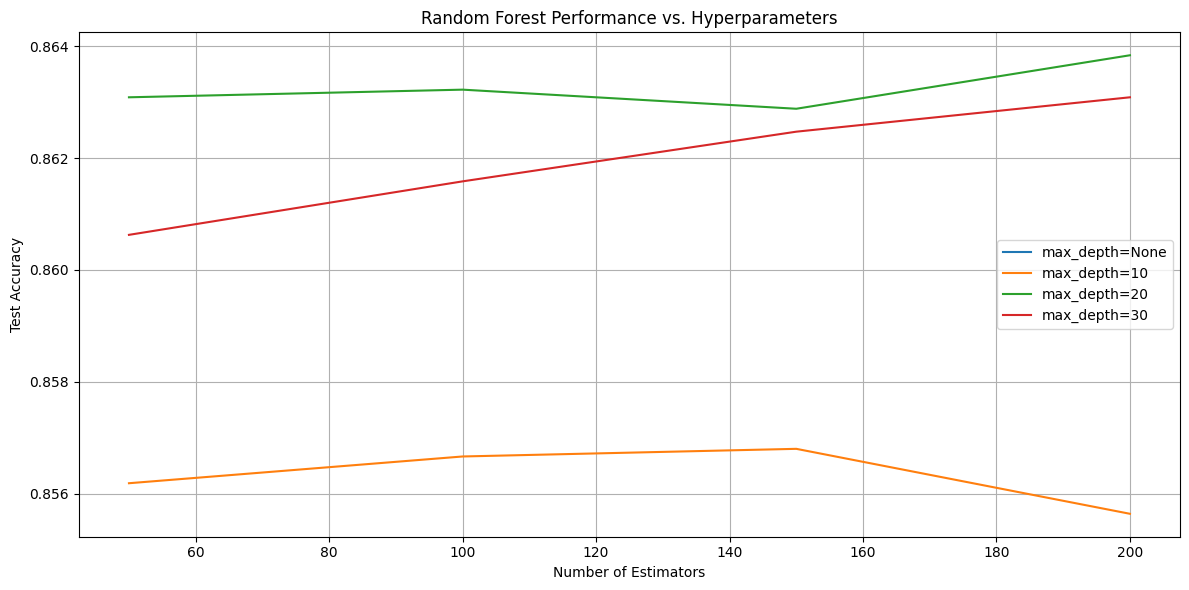

Best parameters: n_estimators=200.0, max_depth=20.0 with accuracy: 0.8638


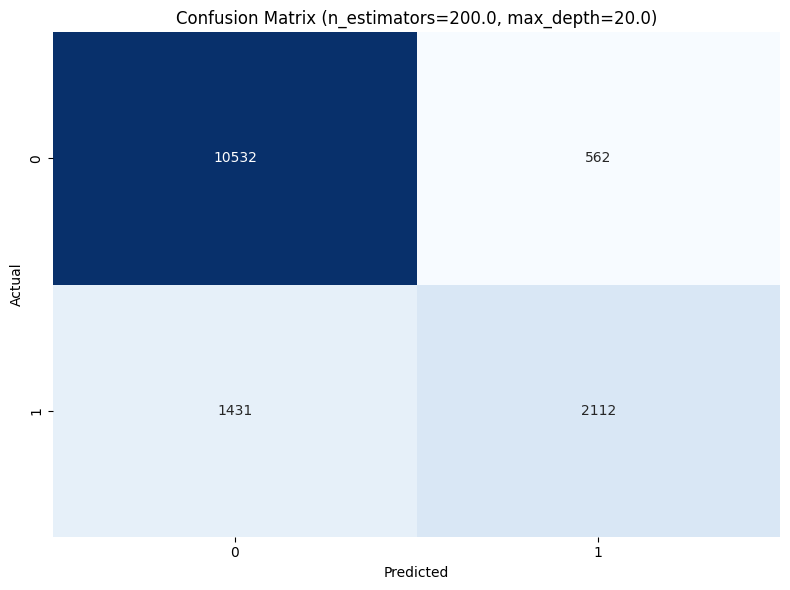

In [76]:
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter ranges with integer values
n_estimators_values = [50, 100, 150, 200]
max_depth_values = [None, 10, 20, 30]

# Initialize lists to store results
train_scores = []
test_scores = []
results = []

# Train models with different hyperparameters
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create and train the model
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        
        # Predict on train and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        
        # Calculate and store accuracy scores
        train_acc = accuracy_score(y_train, y_train_pred)
        test_acc = accuracy_score(y_test, y_test_pred)
        
        train_scores.append(train_acc)
        test_scores.append(test_acc)
        
        # Store the results
        results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'train_accuracy': train_acc,
            'test_accuracy': test_acc
        })
        
        print(f"n_estimators={n_estimators}, max_depth={max_depth}")
        print(f"  Train accuracy: {train_acc:.4f}")
        print(f"  Test accuracy: {test_acc:.4f}")
        print("-" * 50)

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Plot the results
plt.figure(figsize=(12, 6))
for max_depth in max_depth_values:
    subset = results_df[results_df['max_depth'] == max_depth]
    plt.plot(subset['n_estimators'], subset['test_accuracy'], label=f'max_depth={max_depth}')

plt.xlabel('Number of Estimators')
plt.ylabel('Test Accuracy')
plt.title('Random Forest Performance vs. Hyperparameters')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Find the best parameters based on test accuracy
best_result = results_df.loc[results_df['test_accuracy'].idxmax()]
best_n_estimators = best_result['n_estimators']
best_max_depth = best_result['max_depth']
print(f"Best parameters: n_estimators={best_n_estimators}, max_depth={best_max_depth} with accuracy: {best_result['test_accuracy']:.4f}")

# Train a model with the best parameters for detailed analysis
best_model = RandomForestClassifier(n_estimators=int(best_n_estimators), max_depth=int(best_max_depth), random_state=42)
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)

# Create a confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (n_estimators={best_n_estimators}, max_depth={best_max_depth})')
plt.tight_layout()
plt.show()

## 🧠 Part 5: Model Comparison and Optimization
- Compare all models using Accuracy, Precision, Recall, and F1-score.
- **Reflect:**
   - Which model performed best?
   - How did tuning improve performance?
   - What trade-offs (e.g., overfitting vs. underfitting) did you observe?

👉 **Question:** Summarize which model you would choose for this dataset and why.

In [86]:
best_logistic_model = LogisticRegression(C=best_c, max_iter=1000, random_state=42)
best_logistic_model.fit(X_train_scaled, y_train)
y_test_pred_logistic = best_logistic_model.predict(X_test_scaled)
logistic_report = classification_report(y_test, y_test_pred_logistic, output_dict=True)

best_knn_model = KNeighborsClassifier(n_neighbors=16, metric='euclidean')
best_knn_model.fit(X_train_scaled, y_train)
y_test_pred_knn = best_knn_model.predict(X_test_scaled)
knn_report = classification_report(y_test, y_test_pred_knn, output_dict=True)

best_decision_tree_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_ccp_alpha)
best_decision_tree_model.fit(X_train, y_train)
y_test_pred_tree = best_decision_tree_model.predict(X_test)
tree_report = classification_report(y_test, y_test_pred_tree, output_dict=True)

best_random_forest_model = RandomForestClassifier(n_estimators=int(best_n_estimators), max_depth=int(best_max_depth), random_state=42)
best_random_forest_model.fit(X_train, y_train)
y_test_pred_rf = best_random_forest_model.predict(X_test)
rf_report = classification_report(y_test, y_test_pred_rf, output_dict=True)

<Figure size 1200x800 with 0 Axes>

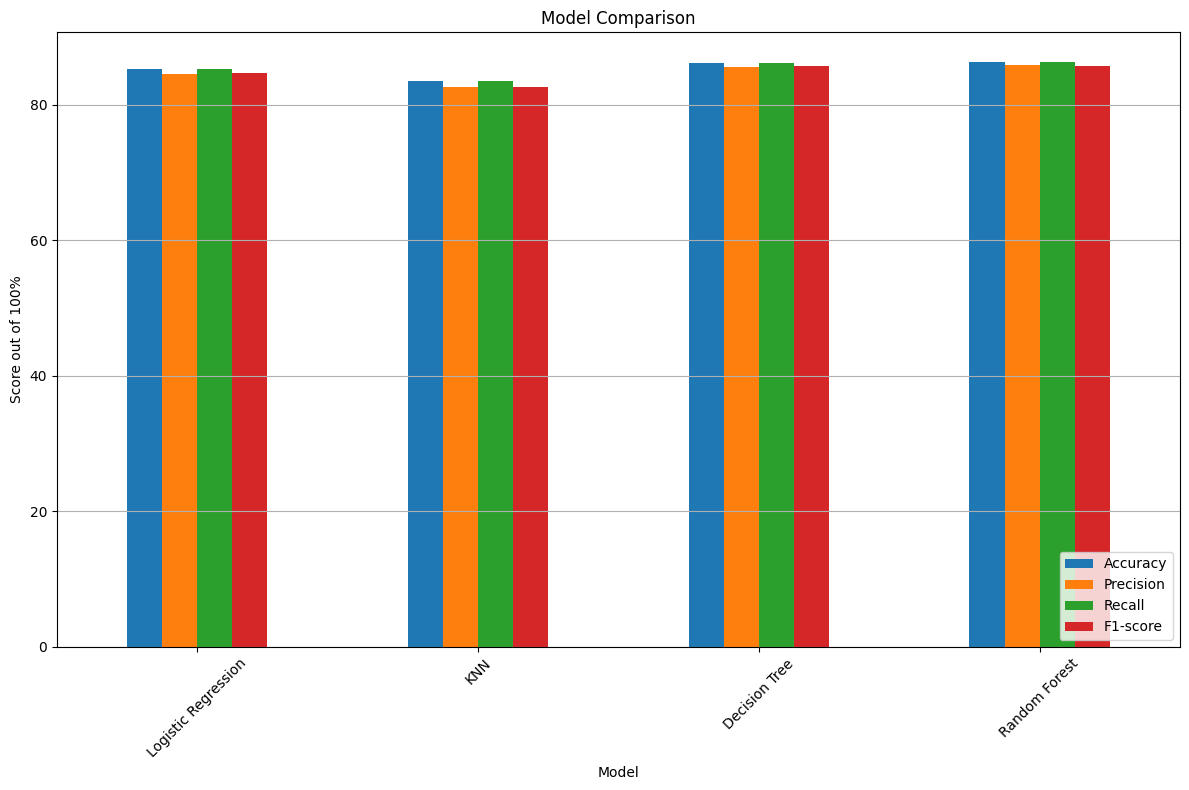

Model Comparison Summary:
                 Model   Accuracy  Precision     Recall   F1-score
0  Logistic Regression  85.277038  84.623153  85.277038  84.668978
1                  KNN  83.521213  82.596448  83.521213  82.579009
2        Decision Tree  86.158366  85.623185  86.158366  85.695138
3        Random Forest  86.383822  85.846207  86.383822  85.688792

The best model based on F1-score is Decision Tree with an F1-score of 85.6951%.


In [90]:
# Extract metrics for each model
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy = [
    logistic_report['accuracy']*100,
    knn_report['accuracy']*100,
    tree_report['accuracy']*100,
    rf_report['accuracy']*100
]
precision = [
    logistic_report['weighted avg']['precision']*100,
    knn_report['weighted avg']['precision']*100,
    tree_report['weighted avg']['precision']*100,
    rf_report['weighted avg']['precision']*100
]
recall = [
    logistic_report['weighted avg']['recall']*100,
    knn_report['weighted avg']['recall']*100,
    tree_report['weighted avg']['recall']*100,
    rf_report['weighted avg']['recall']*100
]
f1_score = [
    logistic_report['weighted avg']['f1-score']*100,
    knn_report['weighted avg']['f1-score']*100,
    tree_report['weighted avg']['f1-score']*100,
    rf_report['weighted avg']['f1-score']*100
]

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
})

# Plot the metrics
plt.figure(figsize=(12, 8))
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison')
plt.ylabel('Score out of 100%')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Reflect on the results
print("Model Comparison Summary:")
print(metrics_df)

# Summarize which model you would choose and why
best_model_index = metrics_df['F1-score'].idxmax()
best_model = metrics_df.iloc[best_model_index]
print(f"\nThe best model based on F1-score is {best_model['Model']} with an F1-score of {best_model['F1-score']:.4f}%.")

## ⭐ Stretch Goal (Optional):
- Use **GridSearchCV** or **RandomizedSearchCV** to fully optimize one model and retrieve best parameters and best model for each.
- Visualize **feature importance** (especially for Decision Tree/Random Forest).

👉 **Bonus Question:** Did advanced tuning or feature importance insights change your final model choice?